### Program Penentuan Entropi <i>Entanglement</i> Pada Sistem Kuantum Model Dicke 

======================//========================//======================

Nama  : Rohma Yuliani (G1B016041)

Program ini dimodifikasi dari penelitian sebelumnya yaitu Johansson, J. R. 2014. QuTiP Lecture: The Dicke Model. https://nbviewer.jupyter.org/github/jrjohansson/qutip-lectures/blob/master/Lecture-3A-Dicke-model.ipynb

Bahan bacaan yang digunakan:
1. Lambert, N., Emary, C., & Brandes, T. 2004. Entanglement and the Phase Transition in Single-Mode Superradiance. Physical Review Letters, 1-4.
2. Khitrova, G., Gibbs, H. M., Kira, M., Koch, S. W., & Scherer, A. 2006. Vacuum Rabi Splitting in Semiconductors. Nature Publishing Group, 81-90.
3. https://matplotlib.org/
4. https://numpy.org/
5. http://qutip.org/downloads/4.5.0/qutip-doc-4.5.pdf

Program ini merupakan coding untuk memperoleh data entropi <i>entanglement</i> beberapa atom (N = 1, 2, 3, 4, 8, 16, dan 32) yang dipengaruhi oleh nilai konstanta kopling.

## Teori

Sistem kuantum model Dicke merupakan sebuah sistem yang mendeskripsikan interaksi antara atom dan foton dalam rongga. Konstanta kopling (g) berperan penting terhadap nilai entropi <i>entanglement</i> sistem kuantum model Dicke. Konstanta kopling menunjukkan kekuatan interaksi dari atom dan foton dalam rongga. Sistem kuantum model Dicke dengan N-atom = 1 dapat dilihat pada Gambar 1.

Persamaan Hamiltonian sistem kuantum model Dicke 
\begin{align*}
\hat H = \omega_{0} \hat J_{z}+ \omega \hat a^{+} \hat a + \frac{g}{\sqrt N} (\hat a + \hat a^{+})(\hat J_{+} + \hat J_{-})
\end{align*}

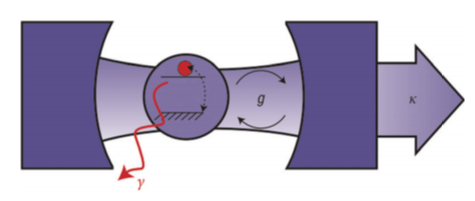

In [1]:
from IPython.display import Image
Image(filename='parameter.PNG') 


Gambar 1. Sistem kuantum model Dicke dengan N-atom = 1 (Khitrova dkk., 2006)

Tahapan program penentuan entropi <i>entanglement</i> pada sistem kuantum model Dicke
1. Import modul
2. Mendefinisikan parameter sistem
3. Membuat Quantum Objek (Qobj)
4. Menghitung Hamiltonian
5. Menghitung entropi <i>entanglement</i>
6. Visualisasi 

## Program

#### 1. Import Modul

In [1]:
%matplotlib inline
from qutip import *   # wajib di import ketika menggunakan fungsi qutip
import numpy as np                
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter, AutoMinorLocator)

#### 2. Mendefinisikan parameter sistem

In [2]:
w  = 1.0              # frekuensi foton
w0 = 1.0              # frekuensi atom
g  = 1                # konstanta kopling
M  = 30               # jumlah keadaan fock untuk foton
N  = 8                # jumlah atom  
j  = N / 2.0          # bilangan kuantum spin
n  = 2 * j + 1        # jumlah keadaan Dicke

#### 3. Membuat Quantum Objek (Qobj)

In [3]:
'''
Operator-operator yang dibuat harus berbasis Quantum Object (Qobj).
'''
# Operator annihilation
'''
Operator annihilation merupakan operator pemusnah untuk foton.
Operator ini berfungsi untuk mengurangi jumlah foton dalam sistem. 
Sedangkan operator creation merupakan operator pencipta untuk foton
yang berfungsi untuk menambah jumlah foton dalam sistem. Dalam coding,
operator annihilation dilambangkan dengan 'a', sedangkan operator
creation dilambangkan dengan a.dag()
'''
a = tensor(destroy(M), qeye(n))

# Operator momentum anguler (operator untuk atom)
Jp = tensor(qeye(M), jmat(j, '+'))    # operator J+
Jm = tensor(qeye(M), jmat(j, '-'))    # operator J-
Jz = tensor(qeye(M), jmat(j, 'z'))    # operator Jz

#### 4. Menghitung Hamiltonian

In [4]:
# Hamiltonian foton dan atom
H0 = w * a.dag() * a + w0 * Jz                 

# Hamiltonian interaksi atom-foton
H1 = 1.0 / sqrt(N) * (a + a.dag()) * (Jp + Jm)  # tanpa RWA

# Hamiltonian sistem
H = H0 + g * H1                               

#### 5. Menghitung Entropi <i>Entanglement</i>

In [5]:
# Membuat fungsi untuk menghitung entropi
'''
Dibuat sebuah fungsi untuk memudahkan dalam perhitungan entropi
entanglement beberapa jumlah atom. 
'''
def calculate_entropy(M, N, g_vec):
    
    j = N / 2.0
    n = 2 * j + 1

    # Operator
    a  = tensor(destroy(M), qeye(n))
    Jp = tensor(qeye(M), jmat(j, '+'))
    Jm = tensor(qeye(M), jmat(j, '-'))
    Jz = tensor(qeye(M), jmat(j, 'z'))
    
    # Hamiltonian Sistem
    H0 = w * a.dag() * a + w0 * Jz
    H1 = 1.0 / sqrt(N) * (a + a.dag()) * (Jp + Jm)

    # Fungsi gelombang ground state untuk Hamiltonian: H = H0 + g * H1
    '''
    Dibutuhkan inputan berupa persamaan hamiltonian sistem untuk
    memperoleh fungsi gelombang. QuTiP telah menyediakan fungsi 
    untuk menghitung fungsi gelombang yaitu psi_gnd    
    '''
    psi_gnd_list = [(H0 + 0.5 * g * H1).groundstate()[1]  for g in g_vec]
    
    entropy_cavity = np.zeros(shape(g_vec))
    entropy_spin   = np.zeros(shape(g_vec))

    for idx, psi_gnd in enumerate(psi_gnd_list):
        
        # Density matrix
        rho_gnd_cavity = ptrace(psi_gnd, 0)
        rho_gnd_spin   = ptrace(psi_gnd, 1)
        
        # Entropi von Neumann
        '''
        Entropi entanglement dihitung menggunakan persamaan entropi
        von Neumann. Pada QuTiP telah disediakan fungsi untuk 
        menghitung entropi von Neumann yaitu entopy_vn
        '''
        entropy_cavity[idx] = entropy_vn(rho_gnd_cavity, 2)
        entropy_spin[idx]   = entropy_vn(rho_gnd_spin, 2)
        
    return entropy_cavity, entropy_spin

#### 6. Visualisasi

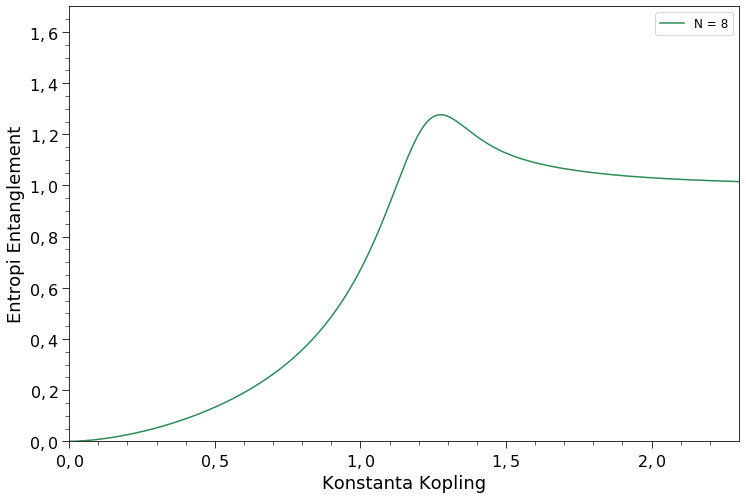

In [6]:
g_vec = np.linspace(0.0, 2.3, 230)  # variasi konstanta kopling
                                    # bagian yang dimodifikasi
N_vec = [8]                         # jumlah atom (disesuaikan)
                                    # bagian yang dimodifikasi
MM = 30                             # jumlah keadaan fock untuk foton   

fig, axes = plt.subplots(1, 1, figsize=(12,8))  # ukuran grafik (12 x 8)

for NN in N_vec:
    
    entropy_cavity, entropy_spin = calculate_entropy(MM, NN, g_vec)
    
    axes.plot(g_vec, entropy_spin, 'seagreen', label="N = %d" % NN)
    

axes.set_ylim(0, 1.7)
axes.set_xlim(0, 2.3)

# Mengubah keterangan titik menjadi koma pada sumbu x dan sumbu y
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6],
           ["$0,0$", "$0,2$", "$0,4$", "$0,6$", "$0,8$", 
            "$1,0$", "$1,2$", "$1,4$","$1,6$"])
plt.xticks([0.0, 0.5, 1.0, 1.5, 2.0],
           ["$0,0$", "$0,5$", "$1,0$", "$1,5$", "$2,0$"])

plt.yticks(size=16)
plt.xticks(size=16)

axes.xaxis.set_minor_locator(AutoMinorLocator())
axes.yaxis.set_minor_locator(AutoMinorLocator())

axes.tick_params(which='major', length=7)
axes.tick_params(which='minor', length=4)

# Keterangan sumbu x dan sumbu y
axes.set_ylabel("Entropi Entanglement", fontsize=18)
axes.set_xlabel("Konstanta Kopling", fontsize=18)

plt.legend(fontsize=12)

# Simpan gambar (simpan file gambar sesuai jumlah atom yang digunakan)
plt.savefig('Entropi Entanglement_N=8_g=0,0-2,3.png', dpi=500)
plt.show()

In [7]:
# Simpan data entropi entanglement (nama file sesuai jumlah atom) 
np.savetxt("entropi_atom8_30.dat", entropy_spin)

# Simpan data waktu
np.savetxt("g_all_30.dat", g_vec)

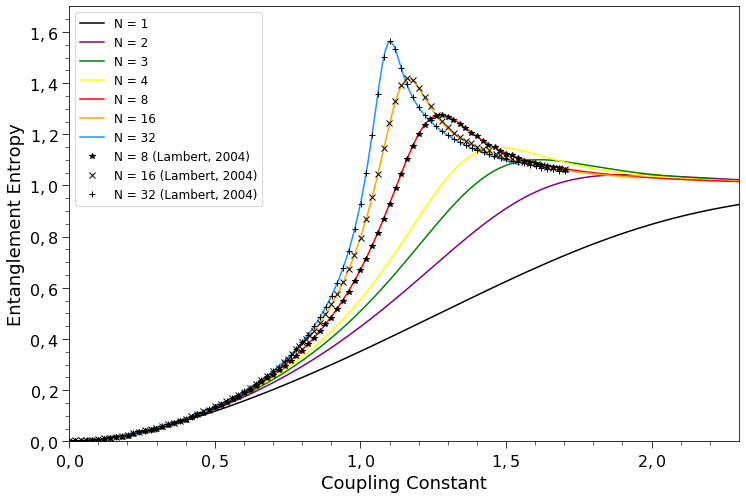

In [8]:
# Grafik Perbandingan Entropi Entanglement dengan hasil Lambert dkk. (2004)

# Import data hasil program (QuTiP)
konstanta = np.loadtxt('g_all_30.dat')
konstanta_16 = np.loadtxt('konstanta_16.dat')
konstanta_32 = np.loadtxt('konstanta_32.dat')
N1 = np.loadtxt('entropi_atom1_30.dat')
N2 = np.loadtxt('entropi_atom2_30.dat')
N3 = np.loadtxt('entropi_atom3_30.dat')
N4 = np.loadtxt('entropi_atom4_30.dat')
N8 = np.loadtxt('entropi_atom8_30.dat')
N16 = np.loadtxt('entropi_atom16_30.dat')
N32 = np.loadtxt('entropi_atom32_30.dat')

# Import Data Referensi
Lambert8 = np.loadtxt('Lambert8.txt')
Lambert16 = np.loadtxt('Lambert16.txt')
Lambert32 = np.loadtxt('Lambert32_rev.txt')
konstantaL8 = np.loadtxt('konstantaL8.txt')
konstantaL16 = np.loadtxt('konstantaL16.txt')
konstantaL32 = np.loadtxt('konstantaL32_rev.txt')


# Visualisasi

fig, axes = plt.subplots(1, 1, figsize=(12,8))

# Data hasil QuTiP
axes.plot(konstanta, N1, 'k', label='N = 1')
axes.plot(konstanta, N2, 'purple', label='N = 2')
axes.plot(konstanta, N3, 'green', label='N = 3')
axes.plot(konstanta, N4, 'yellow', label='N = 4')
axes.plot(konstanta, N8, 'red', label='N = 8')
axes.plot(konstanta_16, N16, 'orange', label='N = 16')
axes.plot(konstanta_32, N32, 'dodgerblue', label='N = 32')

# Data referensi
axes.plot(konstantaL8, Lambert8, 'k*', label='N = 8 (Lambert, 2004)')
axes.plot(konstantaL16, Lambert16, 'kx', label='N = 16 (Lambert, 2004)')
axes.plot(konstantaL32, Lambert32, 'k+', label='N = 32 (Lambert, 2004)')

axes.set_ylim(0, 1.7)
axes.set_xlim(0, 2.3)

# Mengubah keterangan titik menjadi koma pada sumbu x dan sumbu y
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6],
           ["$0,0$", "$0,2$", "$0,4$", "$0,6$", "$0,8$", 
            "$1,0$", "$1,2$", "$1,4$","$1,6$"])
plt.xticks([0.0, 0.5, 1.0, 1.5, 2.0],
           ["$0,0$", "$0,5$", "$1,0$", "$1,5$", "$2,0$"])

plt.yticks(size=16)
plt.xticks(size=16)

axes.xaxis.set_minor_locator(AutoMinorLocator())
axes.yaxis.set_minor_locator(AutoMinorLocator())

axes.tick_params(which='major', length=7)
axes.tick_params(which='minor', length=4)

axes.set_ylabel("Entanglement Entropy", fontsize=18)
axes.set_xlabel("Coupling Constant", fontsize=18)
plt.legend(fontsize=12)

plt.savefig("Entropi_Tanpa RWA_banding_g=0-2,3_M=30-eng.png", dpi = 500)
plt.show()


In [10]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.4.1
Numpy,1.16.5
SciPy,1.3.1
matplotlib,3.1.1
Cython,0.29.13
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,7.8.0
Python,"3.7.4 (default, Aug 9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]"
OS,nt [win32]
